#### 【特許データ】※4つのCSVデータがあります
1. 20230503PA60999all
- 紐づく項目「Publication number」、「Applicant(s) BvD ID Number(s)」、「Current direct owner(s) BvD ID Number(s)」、
- 「Backward citations」…その特許が引用している引用特許のPublication numberが記載されています
- 「Forward citations」…その特許が引用されている被引用特許のPublication numberが記載されています
2. 20230503PA60999abstract
- 紐づく項目「Publication number」
- 「Abstract」…要約です
3. 20230503PA60999claim
- 紐づく項目「Publication number」
- 「Claim」…請求項です
4. 20230503PAcampany4815
- 紐づく項目「BvD ID number」、「Orbis ID number」
- 「Current market capitalisation th JPY」…最近の時価総額です
- 【M&Aデータ】※1つのCSVデータがあります
5. 20230504MA624620
- 紐づく項目「Acquiror BvD ID number」、「Target BvD ID number」


In [3]:
import cugraph
import cudf
import pandas as pd
import numpy as np
import datashader as ds
import cuxfilter
import networkx as nx
import seaborn as sns
import collections as cl
import matplotlib.pyplot as plt

In [4]:
pa_abst_file = "./data/20230503PA60999abstract.csv"
#pa_all_file = "./data/20230503PA60999all.csv"
pa_all_file = "./data/20230524PA61332all.csv"
pa_claim_file = "./data/20230503PA60999claim.csv"
company_file = "./data/20230503PAcampany4815.csv"
ma_file = "./data/20230504MA624620.csv"

In [5]:
pa_abst_df = pd.read_csv(pa_abst_file)
pa_all_df = pd.read_csv(pa_all_file,low_memory=False)
pa_claim_df = pd.read_csv(pa_claim_file)
company_df = pd.read_csv(company_file)
ma_df = pd.read_csv(ma_file)

In [6]:
#pa_abst_df
#pa_all_df
#pa_claim_df
#pa_company_df
#ma_df

In [7]:
# pa_df に統合
pa_tmp_df = pd.merge(pa_all_df, pa_abst_df, on="Publication number")
pa_df = pd.merge(pa_tmp_df, pa_claim_df, on="Publication number")

In [8]:
#pa_df

In [9]:
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 20)
pd.set_option("display.max_colwidth", 50)

In [10]:
pa_df

,Publication number,Publication date,Application number,Application/filing date,Applicant(s) name(s),Applicant(s) country code(s),Applicant(s) BvD ID Number(s),Current direct owner(s) name(s),Current direct owner(s) country code(s),Current direct owner(s) BvD ID Number(s),Number of backward citations,Backward citations,Number of forward citations,Forward citations,Title language,Title,Abstract,Claims
0,AR110295A1,13/03/2019,ARP170103357A,30/11/2017,SONY CORPORATION,JP,JP5010401067252,SONY CORPORATION,JP,JP5010401067252,0,NaN,0,NaN,eng,"APPARATUS FOR PROCESSING INFORMATION, OBSERVAT...",An apparatus for processing the information th...,Having thus especially described and determine...
1,AR118429A1,06/10/2021,ARP200100759A,18/03/2020,NEC CORPORATION,JP,JP7010401022916,NEC CORPORATION,JP,JP7010401022916,0,NaN,0,NaN,eng,"COMPARISON APPARATUS, CONTROL METHOD AND PROGRAM",A comparison apparatus (2000) extracts an imag...,CLAIMSHaving thus especially described and det...
2,AR097926A1,20/04/2016,ARP140103705A,03/10/2014,COLGATE-PALMOLIVE COMPANY,US,US131815595,COLGATE-PALMOLIVE COMPANY,US,US131815595,0,NaN,0,NaN,eng,PROCESSING OF DENTINA TUBE IMAGES,Method for quantifying dentin tubules on a den...,CLAIMS1. \nA method for quantifying dentin tub...
3,AR101678A1,04/01/2017,ARP150102707A,24/08/2015,SONY CORPORATION,JP,JP5010401067252,SONY CORPORATION,JP,JP5010401067252,0,NaN,0,NaN,eng,"INFORMATION PROCESSING DEVICE, INFORMATION PRO...",An information processing device includes: a g...,CLAIMSHaving thus specially described and dete...
4,AU2009251048B2,19/12/2013,AU2009251048A,18/12/2009,CANON KK,JP,JP6010801003186,CANON KK,JP,JP6010801003186,1,US6987883B2,0,NaN,eng,BACKGROUND IMAGE AND MASK ESTIMATION FOR ACCUR...,BACKGROUND IMAGE AND MASK ESTIMATION FOR ACCUR...,The claims defining the invention are as follo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55215,CN115943288A,07/04/2023,CN202180017377A,14/06/2021,Hitachi High-Technologies Corporation,JP,JP4010401021648,Hitachi High-Technologies Corporation,JP,JP4010401021648,0,NaN,0,NaN,eng,"COMPUTER SYSTEM, DIMENSION MEASURING METHOD, A...",The present disclosure provides a computer sys...,1\n. A computer system that provides a functio...
55216,CN115943429A,07/04/2023,CN202180043739A,29/07/2021,KLA-Tencor Corporation,US,US042564110,KLA-Tencor Corporation,US,US042564110,0,NaN,0,NaN,eng,DEPTH GENERATIVE MODELS FOR OPTICAL OR OTHER M...,The present invention provides a method and sy...,1\n. A system configured to select a mode of a...
55217,CN115931716A,07/04/2023,CN202211165002A,23/09/2022,NIDEC SANKYO CORPORATION,JP,JP3100001018326,NIDEC SANKYO CORPORATION,JP,JP3100001018326,0,NaN,0,NaN,eng,HOW TO CHECK LIGHT LEAKAGE,The present invention provides an inspection m...,1\n. A light leakage inspection method for ins...
55218,CN115943424A,07/04/2023,CN202180043417A,25/06/2021,FUJIFILM Corporation,JP,JP2010401064789,FUJIFILM Corporation,JP,JP2010401064789,0,NaN,0,NaN,eng,IMAGE DATA PROCESSING DEVICE AND SYSTEM,The present invention provides an image data p...,1\n. An image data processing device that proc...


In [11]:
pa_df["Current direct owner(s) BvD ID Number(s)"]

0        JP5010401067252
1        JP7010401022916
2            US131815595
3        JP5010401067252
4        JP6010801003186
              ...       
55215    JP4010401021648
55216        US042564110
55217    JP3100001018326
55218    JP2010401064789
55219    JP4010001008772
Name: Current direct owner(s) BvD ID Number(s), Length: 55220, dtype: object

In [12]:
company_ids = list(pa_df["Current direct owner(s) BvD ID Number(s)"])
# companyは";"で区切られていることがある

In [13]:
print(company_ids[100:200])

['US951678055', 'US742747608', 'JP5120001077450', 'US305565539L', 'US201329043L', 'US299794277L', 'US243477398L', 'US252118547L', 'JP5011201010237', 'JP4011001030015', 'US149143136L', 'US370602744', 'US930621989', 'US742747608', 'US942404110', 'US470445638', 'US112308681', 'JP6010801003186', 'JP1020001071491', 'US112308681', 'US942404110', 'US128431668L', 'JP3010401026805', 'US*Z00074622', 'US310568628', 'US220760120', 'US134090555L', 'US149143136L', 'US134696824L', nan, 'US370602744', 'US134696824L', 'JP6010801003186', 'JP1020001071491', 'US942976937', 'JP6010801003186', 'US930822509', 'US163698294L', 'US220760120', 'JP4011001030015', 'JP3010401026805', 'JP4011001030015', 'US246974213L', 'JP4011001030015', 'JP5010401067252', 'US2-247393', 'JP4011001030015', 'US128490825L;US942976937', 'US942976937', 'JP6010801003186', 'US942976937', 'US169903029L', 'US221454160', 'US169541499L', 'US*Z00074622', 'US942404110', 'US146158701L', 'US164429421L', 'US020407755', 'JP6010801003186', 'US1162277

In [12]:
len(company_ids)

55220

In [13]:
len(set(company_ids))

5318

In [14]:
pids = list(pa_df["Publication number"])

In [15]:
pidcompDic = cl.defaultdict(list)
for i,pid in enumerate(pids):
    comp_str = company_ids[i]
    if comp_str is np.nan:
#        print("nan")
        comps = ["NO-NAME"]
    else:
        comps = comp_str.split(';')
        
#    print(comps)
    pidcompDic[pid] = comps
    
#print(comps）

# 目的:
# 特許番号をキー、所有者を値として格納する辞書を作成します。
# 説明:
# defaultdictを使うことで、辞書に存在しないキーへのアクセス時に空のリストを初期値として自動的に追加します。

# 目的:

# 各特許番号に対応する所有者をpidcompDicに登録します。
# 動作:

# enumerate(pids):
# 特許番号リストpidsをインデックスと特許番号のペアに変換。

# comp_str = company_ids[i]:

# 特許番号リストのインデックスiを使って、対応する所有者情報を取得します。
# if comp_str is np.nan:

# np.nan（欠損値）を確認し、欠損値の場合は"NO-NAME"を登録。
# comps = comp_str.split(';'):

# 所有者情報をセミコロン';'で分割。
# 例: '12345;67890' → ['12345', '67890']
# pidcompDic[pid] = comps:

# 特許番号pidをキー、所有者リストcompsを値として辞書に登録。

In [16]:
#pidcompDic

In [17]:
set_pids = set(pids)

# 目的:

# 特許番号のリスト（pids）からユニークな特許番号の集合（set型）を作成します。
# 説明:

# セット型は重複を除き、集合演算（例: 共通要素の抽出）に便利です。


In [18]:
all_c_pids = list(pa_df["Backward citations"])

# 目的:

# 特許データフレームpa_dfから「Backward citations」列をリストとして取得します。
# 説明:

# この列には各特許が参照している過去の特許番号が記載されています。

In [19]:
pa_df["Backward citations"][29]

'US2009238438A1;US2009262993A1'

In [20]:
#all_c_pids

In [21]:
def splitCPidsStr(c_pids_str):
    c_pids_org = c_pids_str.split(';')
    c_pids = list(map(lambda x:x.strip(),c_pids_org))

    return c_pids


# 目的:

# セミコロン（;）で区切られた特許番号を分割し、余分な空白を除去したリストを返します。
# 動作:

# split(';')で文字列をリストに分割。
# strip()で各特許番号の前後の空白を削除。
# それをリストとして返す。


In [22]:
ref_rows = []
froms = []
tos = []
for i, pid in enumerate(pids):
    c_pids_str = all_c_pids[i]
    if c_pids_str is np.nan:
        continue
    else:
        c_pids = splitCPidsStr(c_pids_str)
#        if len(c_pids) > 1:
#            print(c_pids)

# 目的:

# 各特許番号（pid）に対し、引用特許番号を処理します。
# 動作:

# enumerate(pids)で、pidsリストのインデックスと値を取得。
# 特許pidに対応するBackward citations列の値を取得。
# 値がnp.nanの場合はスキップ。
# 値を分割して特許番号のリスト（c_pids）を作成。
# 例:

# 特許番号が '12345' で、c_pids_str が '67890; 11223' の場合、c_pids = ['67890', '11223']。
    
    and_pids = list(set_pids & set(c_pids))
# 目的:
# 現在の特許番号リストset_pidsと、引用特許番号c_pidsの共通部分を取得します。
    
    for c_pid in and_pids:
        row = [pid,c_pid]
        froms.append(pid)
        tos.append(c_pid)
        ref_rows.append(row)

# 目的:

# 現在の特許pidと引用特許c_pid間の関係を追加します。
    
    # 事業パテントスペース用にエッジを追加
    for comp in pidcompDic[pid]:
        if comp == "NO-NAME":
            continue
        else:
            row = [comp,pid]
            froms.append(comp)
            tos.append(pid)
            ref_rows.append(row)

In [37]:
#gdf = cudf.DataFrame({"src":froms,"dst":tos})
gdf = pd.DataFrame({"src":froms,"dst":tos})

# 目的:

# fromsとtosを元にエッジリスト形式のデータフレームを作成します。

In [38]:
pd.set_option("display.max_rows", 100)

In [39]:
gdf

,src,dst
0,JP6010801003186,AU2009251048B2
1,JP3010401026805,AU2012203130B2
2,US127846024L,AU2010200298B2
3,JP4011001030015,AU2011265366B2
4,JP3010401026805,AU2011250825B2
...,...,...
60204,CN111816579B,US2018080763A1
60205,CN111816579B,US2005162644A1
60206,CN111816579B,EP2434453A2
60207,CN9360207637,CN111816579B


In [45]:
#G = cugraph.Graph()

In [46]:
#G.from_cudf_edgelist(gdf, source='src', destination='dst')
G = nx.from_pandas_edgelist(gdf, source='src', target='dst')

In [47]:
G.nodes()

NodeView(('JP6010801003186', 'AU2009251048B2', 'JP3010401026805', 'AU2012203130B2', 'US127846024L', 'AU2010200298B2', 'JP4011001030015', 'AU2011265366B2', 'AU2011250825B2', 'US133294755L', 'AU2014272171B2', 'US910425694', 'AU2011229903B2', 'AU2013273657B2', 'US275530856L', 'AU2012242587B2', 'AU2016225824B2', 'AU2012227365B2', 'AU2012227365A8', 'AU2012227365B8', 'US943267295', 'AU2015257444B2', 'US134090555L', 'AU2016335123B2', 'AU2018200411B2', 'US236942264L', 'AU2016213696B2', 'US042695240', 'AU2014223201B2', 'US470445638', 'AU2013205131B2', 'AU2017345812B2', 'US2015213302A1', 'US*Z00074622', 'US770430924', 'AU2015271906B2', 'US220760120', 'AU2017258863B2', 'US201901148', 'AU2014293238B2', 'AU2013205131A8', 'US128431668L', 'AU2015324689B2', 'AU2018282455B2', 'US2005100208A1', 'US930621989', 'AU2009250344B2', 'US942404110', 'AU2012227166B2', 'AU2008261138B2', 'AU2018220103B2', 'US9740937B2', 'US112308681', 'AU2016216614B2', 'US149143136L', 'AU2015320751B2', 'US134696824L', 'AU201620471

In [55]:
#hdf = cugraph.connected_components(G, connection="weak")
largest_cc = max(nx.connected_components(G), key=len)

In [60]:
#sel_nodes_set = set(largest_cc)

In [30]:
#sdf = hdf["labels"].value_counts()

In [56]:
#sdf

In [57]:
#maxlabel = sdf.index[0]

In [33]:
#sdf.index[0]

3128

In [34]:
#nodes = hdf["vertex"][hdf["labels"]==maxlabel]

In [36]:
#type(nodes)

cudf.core.series.Series

In [62]:
#sG = cugraph.subgraph(G,nodes)
snxG = nx.subgraph(G,largest_cc)

In [73]:
sdf = pd.DataFrame(snxG.edges())

In [76]:
sG = cugraph.from_pandas_edgelist(sdf, source=0, destination=1)

In [77]:
# clustering
#parts, modularity_score = cugraph.leiden(sG, max_iter=10000, resolution=1)
parts, modularity_score = cugraph.louvain(sG, max_iter=10000, resolution=0.1)

/opt/anaconda3/lib/python3.12/site-packages/cugraph/community/louvain.py:146: FutureWarning: max_iter has been renamed max_level.  Use of max_iter is deprecated and will no longer be supported in the next releases.
  warnings.warn(warning_msg, FutureWarning)
/opt/anaconda3/lib/python3.12/site-packages/cugraph/community/louvain.py:154: UserWarning: max_level is set too high, clamping it down to 500.
  warnings.warn(w_msg)


In [78]:
parts

,partition,vertex
0,1,US9947092B2
1,0,JP2007097842A
2,1,JPWO2020080299A1
3,0,CN102612634B
4,1,EP2423877A1
...,...,...
35980,0,US2021364447A1
35981,0,JP2010002960A
35982,0,US2015071543A1
35983,13,JP2015135330A


In [79]:
parts["partition"].max()

15

In [80]:
parts["partition"].min()

0

In [81]:
c_dicts = parts.to_dict(orient="list")

In [82]:
#c_dicts["vertex"]

In [83]:
# cDic[patent_id] = cluster_id
cDic = {}
for i, v in enumerate(c_dicts["vertex"]):
    cid = c_dicts["partition"][i]
#    if cid == ' ':
#        print("HERE")
        
    cDic[v] = cid

In [84]:
#cDic["JP2014085115A"]

In [85]:
modularity_score

0.9049507975578308

In [86]:
#cp = sns.color_palette(n_colors=parts["partition"].max()+1)
cp = sns.color_palette("muted",n_colors=parts["partition"].max()+1)

In [87]:
cp

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215),
 (0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882)]

In [88]:
cp[1]

(0.9333333333333333, 0.5215686274509804, 0.2901960784313726)

In [89]:
sG.nodes()

0          WO2019087536A1
1           JP2015021764A
2          WO2015147317A1
3           JP2020087133A
4             US9311712B2
               ...       
35980        US10535128B2
35981    JPWO2017130613A1
35982      WO2020217878A1
35983        CN103810690A
35984         US9947092B2
Name: 0, Length: 35985, dtype: object

In [90]:
df_page = cugraph.pagerank(sG)

/opt/anaconda3/lib/python3.12/site-packages/cugraph/link_analysis/pagerank.py:227: UserWarning: Pagerank expects the 'store_transposed' flag to be set to 'True' for optimal performance during the graph creation
  warnings.warn(warning_msg, UserWarning)


In [91]:
df_page

,pagerank,vertex
0,0.000012,US9947092B2
1,0.000019,JP2007097842A
2,0.000017,JPWO2020080299A1
3,0.000019,CN102612634B
4,0.000019,EP2423877A1
...,...,...
35980,0.000077,US2017140524A1
35981,0.000101,JP2120901001628
35982,0.000057,EP2031558A2
35983,0.000088,JP1010605002372


In [92]:
df_page[df_page["pagerank"] == df_page["pagerank"].max()]

,pagerank,vertex
17153,0.02021,JP6010801003186


In [93]:
pd.set_option("display.max_rows", 100)

In [94]:
df_page.sort_values("pagerank", ascending=False)

,pagerank,vertex
17153,0.020210,JP6010801003186
17154,0.012569,JP5010401067252
17155,0.009006,JP7010401022916
17156,0.007908,JP2010401064789
17157,0.007026,JP1020001071491
...,...,...
10984,0.000007,US11269983B2
31620,0.000007,CN110662489A
32196,0.000007,JP2020515335A
34866,0.000007,WO2005106797A1


In [95]:
pd.set_option("display.max_colwidth", None)

In [96]:
pa_df["Title"][pa_df["Publication number"] == "JP6010801003186"]

Series([], Name: Title, dtype: object)

In [97]:
pa_df["Abstract"][pa_df["Publication number"] == "JP6010801003186"]

Series([], Name: Abstract, dtype: object)

In [98]:
pos_gdf = cugraph.force_atlas2(sG, max_iter=10000, pos_list=None, outbound_attraction_distribution=True, lin_log_mode=False, prevent_overlapping=False, edge_weight_influence=1.0, jitter_tolerance=1.0, barnes_hut_optimize=True, barnes_hut_theta=0.5, scaling_ratio=50.0, strong_gravity_mode=False, gravity=10, verbose=False, callback=None)
#pos_gdf = cugraph.force_atlas2(sG, max_iter=1000, pos_list=None, outbound_attraction_distribution=True, lin_log_mode=True, prevent_overlapping=False, edge_weight_influence=1.0, jitter_tolerance=1.0, barnes_hut_optimize=True, barnes_hut_theta=0.5, scaling_ratio=2.0, strong_gravity_mode=False, gravity=1.0, verbose=False, callback=None)
# 目的:

# ForceAtlas2アルゴリズムを使ってグラフのノード配置（座標）を計算。
# 説明:

# 力学的モデルに基づき、ノード間の配置を最適化。
# 結果:

# 各ノードの座標を含むデータフレーム。

In [99]:
pos_gdf

,x,y,vertex
0,69684.015625,-57496.613281,US9947092B2
1,40991.082031,-122560.914062,US2018137551A1
2,368508.687500,259421.187500,US9081026B2
3,5678.378906,-15502.473633,US10169853B2
4,70484.070312,-56740.046875,CN100387196C
...,...,...,...
35980,-26423.804688,438515.750000,CN107960983B
35981,30429.083984,3733.505371,US8194969B2
35982,83216.765625,-188148.093750,WO2022004569A1
35983,-335575.281250,248868.531250,CN103003842B


In [100]:
edf = sG.edges().to_pandas()

In [101]:
edf

,0,1
0,JP2016081212A,JP2019139433A
1,JP2016081212A,WO2021181715A1
2,JP2016081212A,JP2018017101A
3,JP2016081212A,WO2022064565A1
4,US2002021839A1,US8837856B2
...,...,...
27352,JP2018190132A,US11526991B2
27353,JP2014052811A,JP2016038796A
27354,JP2009140283A,JP2014206935A
27355,JP2014041427A,JP2019186918A


In [102]:
edf.to_csv("./edges.csv", index=False)

In [107]:
nxG = nx.from_pandas_edgelist(edf, source=0, target=1)

In [108]:
vs = list(pos_gdf["vertex"].to_pandas())
xs = list(pos_gdf["x"].to_pandas())
ys = list(pos_gdf["y"].to_pandas())

In [109]:
#cDic[vs[1]]

In [110]:
pos = {}
cposDic = cl.defaultdict(list)
cpidDic = cl.defaultdict(list)
pidcidDic = {}
node_sizes = []
node_colors = []
labels = []
for i, v in enumerate(vs):
    x = xs[i]
    y = ys[i]
    pos[v] = [x,y]
    cl_id = cDic[v]
    cposDic[cl_id].append([x,y])
    node_sizes.append(1)
    c = cp[cl_id]
    node_colors.append(c)
    labels.append(f"C{cl_id:02}")
    cpidDic[cl_id].append(v)
    pidcidDic[v] = cl_id

# 目的:

# 各ノードの座標、クラスタID、描画属性（色、サイズ）を準備。
# 説明:

# pos: ノードIDと座標を格納。
# cposDic: クラスタIDごとのノード座標を格納。
# node_sizes, node_colors: 描画用の属性。

In [111]:
for cid in sorted(cposDic.keys()):
    print(f"{cid}:{len(cposDic[cid])}")
#    if cid > 10:
#        break

0:20846
1:8546
2:4648
3:1338
4:86
5:35
6:107
7:54
8:120
9:56
10:30
11:38
12:21
13:22
14:24
15:14


In [112]:
centroidDic = {}
for cid in cposDic.keys():
    poses = np.array(cposDic[cid])
#    print(poses.shape)
#    print(poses)
    x, y = np.average(poses, axis=0)
    centroidDic[cid] = (x,y)

In [113]:
nx.set_node_attributes(nxG,cDic,"clusterid")

In [114]:
#nx.draw(nxG,pos,with_labels=False,node_size=node_sizes)

In [115]:
#nx.draw_networkx_nodes(nxG,pos,nodelist=vs, node_size=node_sizes,node_color=node_colors,alpha=0.5)

In [116]:
nx.write_gexf(nxG,"./tech.gexf")

/tmp/ipykernel_87362/2144810173.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=cp[cid], alpha=1.0, label=f"C{cid:02}")


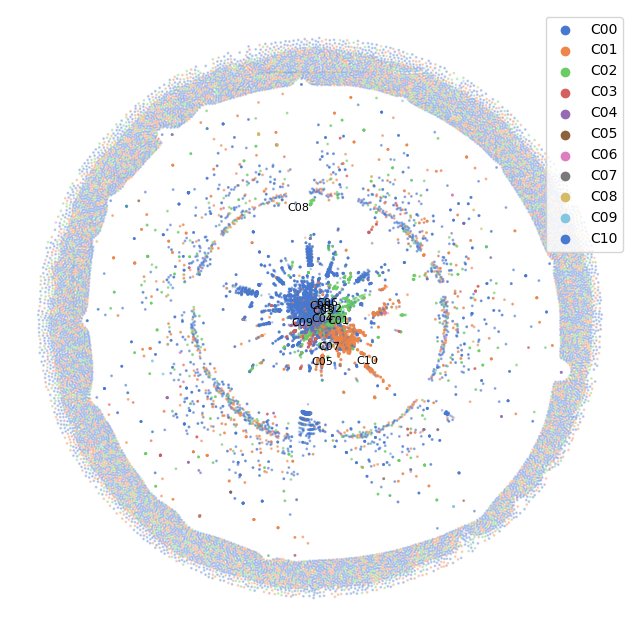

In [117]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.axis('off')
ax.scatter(xs,ys,s=node_sizes,c=node_colors,alpha=0.3)
# 凡例用に空のデータをlabel付でプロットする（実際はなにもプロットしてない）
cids = sorted(centroidDic.keys())
for cid in cids:
    if cid > 10:
        break

    ax.scatter([], [], c=cp[cid], alpha=1.0, label=f"C{cid:02}")
    
ax.legend(loc="upper right")

for cid in cids:
    if cid > 10:
        break
        
    x,y = centroidDic[cid]
    ax.annotate(f"C{cid:02}",(x,y),size=8)

In [118]:
# cluster名の抽出
from sklearn.feature_extraction.text import TfidfVectorizer

all_pids = pa_df["Publication number"].tolist()
all_titles = pa_df["Title"].tolist()
all_absts = pa_df["Abstract"].tolist()

cDocDic = cl.defaultdict(str)
vs_set = set(vs)
for i, pid in enumerate(all_pids):
    if pid not in vs_set:
        continue
        
    cid = cDic[pid]
    title = all_titles[i]
    cDocDic[cid] += f" {title}. "
#    abst = all_absts[i]
#    cDocDic[cid] += f" {title}. {abst}."

In [119]:
#cDocDic[40]

In [120]:
corpus = []
for cid in sorted(cDocDic.keys()):
    adoc = cDocDic[cid]
    corpus.append(adoc)

In [121]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

In [122]:
vocab = vectorizer.get_feature_names_out()
#print(X.toarray())

In [123]:
X.shape

(16, 6149)

In [124]:
#from scipy.stats import rankdata
cWDic = {}
for i in range(X.shape[0]):
#    if i > 0:
#        break
        
    vals = X[i,:]
    res = np.argsort(vals)
    big_indices = res[-20:]
    ws = []
    for idx in big_indices:
        w = vocab[idx]
        ws.append(w)
        
    cWDic[i] = ws

In [125]:
for cid in sorted(cWDic.keys()):
    ws = cWDic[cid]
    line = " ".join(ws)
    print(f"C{cid:02}: {line}")

C00: control position recording of programs object recognition for medium equipment system detection apparatus program information device method image processing and
C01: computer medium systems in detection images information imaging methods program of system device apparatus medical for method processing image and
C02: dimensional methods using measurement substrate program pattern detection defect measuring system of apparatus processing device for image inspection method and
C03: to on systems camera apparatus based methods using device detection images depth in processing system of method image for and
C04: tread vision camera estimation in vehicle wear system castings surface based using detection wet road tire for of method and
C05: within to data source multiple auxiliary fragile image images processing security watermarks watermark systems method encoding content and methods for
C06: on belt detection gender analysis multi systems fertility eggs unhatched plant methods detecti

In [126]:
# 特化係数の算出
# CS = {(企業Aのクラスタxに属する特許数)/(企業Aの全特許数)} /{(クラスタxに属する特許数)/(全特許数)}

all_sum = 0
sums = []

for cid in sorted(cpidDic.keys()):
    pids = cpidDic[cid]
    sums.append(len(pids))
    all_sum += len(pids)
    
entire_ratio = np.array(sums)/all_sum

In [127]:
entire_ratio

array([5.79296929e-01, 2.37487842e-01, 1.29164930e-01, 3.71821592e-02,
       2.38988467e-03, 9.72627484e-04, 2.97346116e-03, 1.50062526e-03,
       3.33472280e-03, 1.55620397e-03, 8.33680700e-04, 1.05599555e-03,
       5.83576490e-04, 6.11365847e-04, 6.66944560e-04, 3.89050993e-04])

In [128]:
sum(entire_ratio)

1.0

In [129]:
all_comps = []
for comps in pidcompDic.values():
#    print(comps)
    all_comps.extend(comps)
    
comp_set = set(all_comps)

print(len(comp_set))
len_cids = len(cpidDic.keys())


# 会社、クラスタごとの特許数のカウント
compPCDic = {}
for comp in list(comp_set):
    compPCDic[comp] = np.zeros(len_cids)
    
for pid in pidcidDic.keys():
    cid = pidcidDic[pid]
    comps = pidcompDic[pid]
    for comp in comps:
            compPCDic[comp][cid] += 1

over_ten_comps = []
over_ten_comps_clusters = [[] for i in range(len_cids)]
for comp in list(comp_set):
    for cid in range(len_cids):
        num_patent = compPCDic[comp][cid]        
        if num_patent >= 10: 
            over_ten_comps_clusters[cid].append(comp)             

4823


In [130]:
comp_ratioDic = {}
for comp in compPCDic.keys():
    vals = compPCDic[comp]
    a_sum = sum(vals)
    ratio = vals/a_sum
    ratio = np.nan_to_num(ratio)
#    print(ratio)
#    break
    comp_ratioDic[comp] = ratio

In [131]:
csDic = {}
for i, comp in enumerate(comp_ratioDic.keys()):        
#    print(comp)
    ratio = comp_ratioDic[comp]
#    print(ratio)
    cs_vals = ratio / entire_ratio
#    print(entire_ratio)
#    print(cs_vals)
    csDic[comp] = cs_vals

In [132]:
#csDic

In [133]:
len(csDic.keys())

4823

In [134]:
# クラスタごとに特化係数の高い企業を表示
comps = list(csDic.keys())

cidCsDic = {}
for cid in sorted(cWDic.keys()):
    cidCsDic[cid] = []
    for i,comp in enumerate(comps):
        cs_vals = csDic[comp]
        cs_val = cs_vals[cid]
        cidCsDic[cid].append(cs_val)


In [135]:
#cidCsDic

In [136]:
for cid in sorted(cWDic.keys()):
#    if cid > 0:
#        break 
        
    cs_vals = cidCsDic[cid]
#    print(cs_vals)
#    print(sorted(cs_vals))
    res = np.argsort(cs_vals)
#    print(res)
    compvals = []
    for idx in res[-10:]:
#        print(idx)
        cs_val = cs_vals[idx]
#        print(cs_val)
        comp = comps[idx]
        if comp in over_ten_comps_clusters[cid]:
            compval = f"{comp}:{cs_val:.04f}"
            compvals.append(compval)
        
    compvalstr = ",".join(compvals)
    print(f"C{cid:02}: {compvalstr}")

C00: JP9013205001282:1.7262,JP1010001134761:1.7262
C01: 
C02: 
C03: US127280975L:26.8946,US253929956L:26.8946,US242167328L:26.8946,CA31738NC:26.8946
C04: US245249435L:398.1836
C05: US262828185:815.4236
C06: 
C07: JP7120901026083:563.8675,US220760120:666.3889
C08: 
C09: US*110009553118:556.9107
C10: US136764157L:1199.5000,US123993951L:1199.5000,US310506188L:1199.5000
C11: US140430613L:946.9737,US361115800:946.9737
C12: 
C13: 
C14: 
C15: 


In [137]:
#cidCsDic[0]

In [138]:
# M&Aデータとの突合
madf = pd.read_csv("./data/20230504MA624620.csv",encoding='utf-8')

In [139]:
madf

,Deal Number,Acquiror name,Acquiror country code,Acquiror BvD ID number,Pre-deal acquiror total assets th JPY Last avail. yr,Pre-deal acquiror market capitalisation (Last available year) th JPY,Target name,Target country code,Target BvD ID number,Pre-deal target total assets th JPY Last avail. yr,Pre-deal target market capitalisation (Last available year) th JPY,Deal type,Deal status,Deal value th JPY,Rumour date,Announced date,Completed date,Last deal status date
0,1941571578,APPLE INC.,US,US942404110,"35,450,779,941","219,765,469,511",TESLA INC.,US,US912197729,"5,707,797,981","73,214,220,011",Acquisition 100%,Rumour,"73,398,285,545",30/07/2021,NaN,NaN,30/07/2021
1,1941646802,CPI PROPERTY GROUP SA,LU,LULB102254,"1,304,788,370","662,897,346",IMMOFINANZ AG,AT,ATFEB18921,"581,516,200","357,867,428",Acquisition increased from 35.49% to 100% Bid 3 - Increased offer,Announced,"26,223,285,898",03/12/2021,31/01/2022,NaN,31/01/2022
2,91314,AMERICA ONLINE INC.,US,US541322110,n.a.,n.a.,TIME WARNER INC.(OLD),US,US133527249,"5,981,825,073",n.a.,Acquisition 100%,Completed,"21,241,497,142",10/01/2000,10/01/2000,11/01/2001,11/01/2001
3,63699,VODAFONE AIRTOUCH PLC,GB,GB01833679,"16,646,803,042",n.a.,MANNESMANN AG,DE,NaN,n.a.,n.a.,Acquisition 100% Bid 2 - Increased offer,Completed,"20,620,512,576",13/11/1999,04/02/2000,30/06/2000,30/06/2000
4,68143,GLAXOSMITHKLINE PLC,GB,GB03888792,"3,164,896,749",n.a.,SMITHKLINE BEECHAM PLC|GLAXO WELLCOME PLC,GB|GB,GB02337959|GB01047315,n.a.|n.a.,n.a.|n.a.,Acquisition,Completed,"20,060,866,791",17/01/2000,17/01/2000,27/12/2000,27/12/2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624615,2007146110,ASAMA FACTORY KK,JP,JP6180001138700,n.a.,n.a.,"ICHINEN JIKCO CO., LTD",JP,JP4010001125477,"2,862,536",n.a.,Acquisition 100%,Completed,n.a.,02/08/2021,02/08/2021,01/04/2022,01/04/2022
624616,2007146140,"USS CO., LTD",JP,JP3180001094608,"196,897,000","677,873,000",JAPAN AUTOMOBILE AUCTION INC.|HAA KOBE INC.,JP|JP,JP6011701013911|JP3140001022423,n.a.|n.a.,n.a.|n.a.,Acquisition unknown % and 100%,Completed,n.a.,03/08/2021,03/08/2021,01/10/2021,01/10/2021
624617,2007146147,RIA ADVISORY LLC,US,US288475001L,n.a.,n.a.,TMG CONSULTING INC.,US,US266480609L,n.a.,n.a.,Acquisition 100%,Completed,n.a.,01/05/2023,01/05/2023,01/05/2023,01/05/2023
624618,2007146158,AMETEK INC.,US,US141682544,"1,693,572,745","4,371,464,368",BISON GEAR & ENGINEERING CORPORATION,US,US140633525L,n.a.,n.a.,Acquisition 100%,Completed,n.a.,02/05/2023,02/05/2023,02/05/2023,02/05/2023


In [140]:
ac_comps = list(madf["Acquiror BvD ID number"])
ta_comps = list(madf["Target BvD ID number"])

In [141]:
def splitCompsStr(ac_comps, ta_comps):
    # 複数企業間のMAを１：１対応に分解
    all_ac_comps = []
    all_ta_comps = []
    for i,ac_comp_str in enumerate(ac_comps):
        if ac_comp_str is np.nan:
            continue
            
        ta_comp_str = ta_comps[i]
        if ta_comp_str is np.nan:
            continue
            
        ac_comp_org = ac_comp_str.split('|')
        ta_comp_org = ta_comp_str.split('|')
        for an_ac_comp in ac_comp_org:
            for an_ta_comp in ta_comp_org:
                all_ac_comps.append(an_ac_comp)
                all_ta_comps.append(an_ta_comp)

    return all_ac_comps, all_ta_comps

In [142]:
all_ac_comps, all_ta_comps = splitCompsStr(ac_comps, ta_comps)

In [143]:
ma_comps = set(all_ac_comps+all_ta_comps)

In [144]:
pa_comps = set(comps)

In [145]:
#ma_comps

In [146]:
#ma_comps & pa_comps

In [147]:
# maデータの会社名突合できないことがわかった
# nayose.ipynbで名寄せを実行、結果をファイルに格納
#ndf = pd.read_csv("./date/nayose_result.csv")

In [148]:
#nayose_pmDic = {} # patent company -> ma company
#nayose_mpDic = {} # ma company -> patent company

#nayose_pa_comps = list(ndf["patent"])
#nayose_ma_comps = list(ndf["ma"])
#nayose_sims = list(ndf["similarity"])
#print(len(nayose_pa_comps))

#sel_nayose_pa_comps = []
#sel_nayose_ma_comps = []

#for i, sim in enumerate(nayose_sims):
#    if sim < 0.9:
#        continue
        
#    nayose_pa_comp = nayose_pa_comps[i]
#    nayose_ma_comp = nayose_ma_comps[i]
#    nayose_pmDic[nayose_pa_comp] = nayose_ma_comp
#    nayose_mpDic[nayose_ma_comp] = nayose_pa_comp
#    sel_nayose_pa_comps.append(nayose_pa_comp)
#    sel_nayose_ma_comps.append(nayose_ma_comp)
    
    
#nayose_pa_comps_set = set(sel_nayose_pa_comps)
#nayose_ma_comps_set = set(sel_nayose_ma_comps)

In [149]:
#len(nayose_pa_comps_set)

In [150]:
list_nodes = [str(n) for n in pos.keys()]

In [151]:
len(list_nodes)

35985

In [152]:
set_nodes = set(list_nodes)

In [153]:
len(set_nodes)

35985

In [154]:
list(set_nodes)[100:120]

['WO2021075198A1',
 'WO2021075278A1',
 'JPWO2021002001A1',
 'JP2003302898A',
 'JP4011001030015',
 'WO0103417A1',
 'JP2006318062A',
 'US11175212B2',
 'JP2019174346A',
 'US126788622L',
 'JP2012027668A',
 'US2015287206A1',
 'US2015285746A1',
 'US9905010B2',
 'JP2006031200A',
 'US2017228940A1',
 'US301734023L',
 'US9552514B2',
 'EP2669845A2',
 'JP2016053867A']

In [155]:
#ma_at_pairs = []
#for i,ac_comp in enumerate(ac_comps):
#    ta_comp = ta_comps[i]
#    if ac_comp in nayose_ma_comps_set and ta_comp in nayose_ma_comps_set:
#        if ac_comp in set_nodes and ta_comp in set_nodes:
#            ac_comp_pa = nayose_mpDic[ac_comp]
#            ta_comp_pa = nayose_mpDic[ta_comp]
#            ma_at_pairs.append((ac_comp_pa,ta_comp_pa))

In [156]:
ma_at_pairs = []
for i,ac_comp in enumerate(all_ac_comps):
    if ac_comp is np.nan:
        continue
        
    ta_comp = all_ta_comps[i]
    if ta_comp is np.nan:
        continue
        
    if ac_comp == ta_comp:
        continue
        
    if len(set([ac_comp,ta_comp])&pa_comps) == 2:
        ma_at_pairs.append((ac_comp,ta_comp))

In [157]:
len(ma_at_pairs)

268

In [158]:
#len(ma_at_pairs)

In [159]:
#print(ma_at_pairs[0:10])

In [160]:
#pos.keys()

In [161]:
# ma 座標算出
# cDic[v] = cid # cluster id
# pos[v] = [x,y]
ac_xs = []
ac_ys = []
ta_xs = []
ta_ys = []
for i,(ac_comp,ta_comp) in enumerate(ma_at_pairs):
    try:
        ac_x,ac_y = pos[ac_comp]
        ta_x,ta_y = pos[ta_comp]
    except KeyError as e:
#        print(e)
        continue
        
    ac_xs.append(ac_x)
    ac_ys.append(ac_y)
    ta_xs.append(ta_x)
    ta_ys.append(ta_y)

/tmp/ipykernel_87362/422160304.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=cp[cid], alpha=1.0, label=f"C{cid:02}")


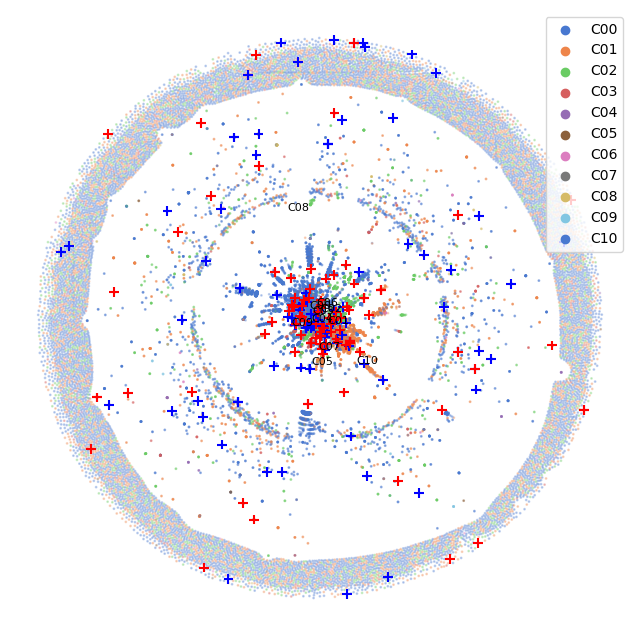

In [162]:
# PAネットワーク上でMAを可視化
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.axis('off')
ax.scatter(xs,ys,s=node_sizes,c=node_colors,alpha=0.3)
ax.scatter(ta_xs,ta_ys,s=[50]*len(ta_xs),marker='+',c="blue",alpha=1.0)
ax.scatter(ac_xs,ac_ys,s=[50]*len(ac_xs),marker='+',c="red",alpha=1.0)

# 凡例用に空のデータをlabel付でプロットする（実際はなにもプロットしてない）
cids = sorted(centroidDic.keys())
for cid in cids:
    if cid > 10:
        break

    ax.scatter([], [], c=cp[cid], alpha=1.0, label=f"C{cid:02}")
    
ax.legend(loc="upper right")

for cid in cids:
    if cid > 10:
        break
        
    x,y = centroidDic[cid]
    ax.annotate(f"C{cid:02}",(x,y),size=8)

In [163]:
# 距離の評価
#    ac_xs.append(ac_x)
#    ac_ys.append(ac_y)
#    ta_xs.append(ta_x)
#    ta_ys.append(ta_y)

distances = []
for i,ac_x in enumerate(ac_xs):
    ac_y = ac_ys[i]
    ta_x = ta_xs[i]
    ta_y = ta_ys[i]
    distance = ((ta_x - ac_x)**2 + (ta_y - ta_x)**2)**0.5
    distances.append(distance)

In [164]:
np.average(distances)

205065.63800498086

In [165]:
all_patent_companies = []
for comp_list in pidcompDic.values():
    for comp in comp_list:
        all_patent_companies.append(comp)
        
all_patent_companies_set = set(all_patent_companies)

In [166]:
pos_companies = list(set(list(pos.keys())) & all_patent_companies_set)

In [167]:
import random

rand_distances = []
rand_ma_at_pairs = []
for i,ac_x in enumerate(ac_xs):
    ac_comp,ta_comp = random.sample(pos_companies,2)
    rand_ma_at_pairs.append((ac_comp,ta_comp))
    ac_x, ac_y = pos[ac_comp]
    ta_x, ta_y = pos[ta_comp]
    distance = ((ta_x - ac_x)**2 + (ta_y - ta_x)**2)**0.5
    rand_distances.append(distance)

In [168]:
np.average(rand_distances)

280331.8212130234

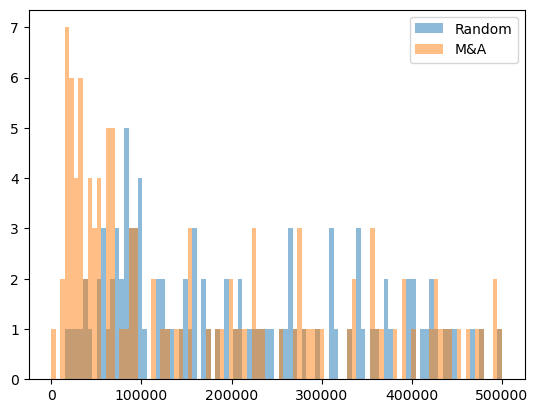

In [169]:
all_distances = distances + rand_distances

#bins = np.linspace(min(all_distances), max(all_distances), 50)
bins = np.linspace(0,0.5e6, 100)

plt.hist(rand_distances, bins, alpha = 0.5, label='Random')
plt.hist(distances, bins, alpha = 0.5, label='M&A')
plt.legend(loc='upper right')

plt.show()

In [170]:
# クラスタ内MA数の割合
# ma_at_pairs
# rand_ma_at_pairs
# cDic[v] = cid

num_clusters = len(set(cDic.values()))
print(num_clusters)

ma_cl_counts = np.zeros((num_clusters,num_clusters),dtype=np.float32)

16


In [171]:
#cDic

In [172]:
all_c = 0
hit_c = 0
for ac_comp, ta_comp in ma_at_pairs:
    all_c += 1
    try:
        ac_cid = cDic[ac_comp]
        ta_cid = cDic[ta_comp]
        hit_c += 1
#        print(ac_cid)
    except KeyError as e:
#        print(e)
        continue
        
#    print(ac_cid)
#    print(ta_cid)
#    print("")
    ma_cl_counts[ac_cid,ta_cid] += 1
    
print(f"{hit_c}/{all_c}")

123/268


In [173]:
import random

rand_ma_at_pairs = []
for i in range(0,len(ma_at_pairs)*10,1):
    ac_comp,ta_comp = random.sample(pos_companies,2)
    rand_ma_at_pairs.append((ac_comp,ta_comp))
    ac_x, ac_y = pos[ac_comp]
    ta_x, ta_y = pos[ta_comp]
    distance = ((ta_x - ac_x)**2 + (ta_y - ta_x)**2)**0.5
    rand_distances.append(distance)

In [174]:
rand_ma_cl_counts = np.zeros((num_clusters,num_clusters),dtype=np.float32)
#print(rand_ma_at_pairs)
for ac_comp, ta_comp in rand_ma_at_pairs:
    try:
        ac_cid = cDic[ac_comp]
        ta_cid = cDic[ta_comp]
    except KeyError as e:
        print(e)
        continue
        
#    print(ac_cid)
#    print(ta_cid)
#    print("")
    rand_ma_cl_counts[ac_cid,ta_cid] += 1

In [175]:
rand_ma_cl_counts += 10

Text(0.5, 1.0, 'M&A counts among Clusters')

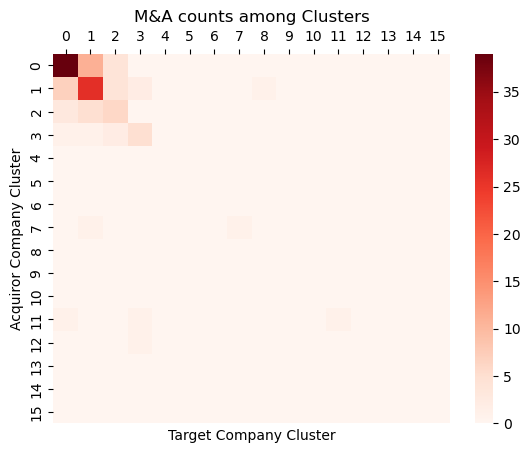

In [176]:
fig, ax = plt.subplots()
sns.heatmap(ma_cl_counts[0:20,0:20],cmap="Reds")
#ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xlabel("Target Company Cluster")
ax.set_ylabel("Acquiror Company Cluster")

# タイトルを設定する。
ax.set_title("M&A counts among Clusters")

Text(0.5, 1.0, 'Random M&A counts among Clusters')

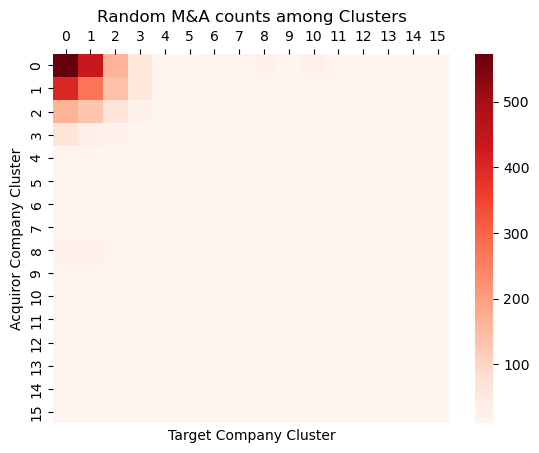

In [177]:
fig, ax = plt.subplots()
sns.heatmap(rand_ma_cl_counts[0:20,0:20],cmap="Reds")
#ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xlabel("Target Company Cluster")
ax.set_ylabel("Acquiror Company Cluster")

# タイトルを設定する。
ax.set_title("Random M&A counts among Clusters")

In [178]:
ma_cl_ratio = ma_cl_counts / rand_ma_cl_counts

In [179]:
#ma_cl_ratio
ma_cl_ratio = np.nan_to_num(ma_cl_ratio, nan=0)
#ma_cl_ratio[ma_cl_ratio < 1e-9] = 0

In [180]:
np.amax(ma_cl_ratio)

0.3846154

Text(0.5, 1.0, 'MA/Random counts ratio among Clusters')

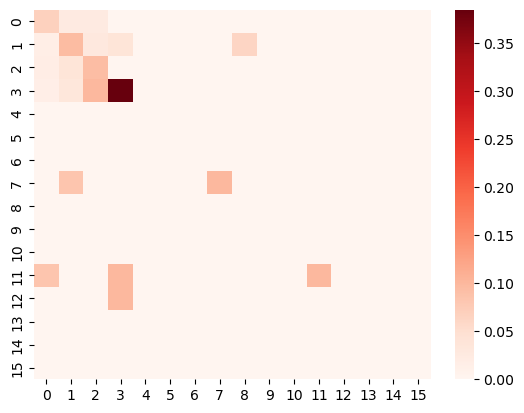

In [181]:
sns.heatmap(ma_cl_ratio[0:20,0:20],cmap="Reds")
#ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xlabel("Target Company Cluster")
ax.set_ylabel("Acquiror Company Cluster")

# タイトルを設定する。
ax.set_title("MA/Random counts ratio among Clusters")

In [182]:
# ratioの高いMAの抽出
#max_idx = ind = np.unravel_index(np.argmax(ma_cl_ratio, axis=None), ma_cl_ratio.shape)
#max_idx
maratios = []
for i in range(0,num_clusters,1):
    for j in range(0,num_clusters,1):
        ratio = ma_cl_ratio[i,j]
        c = ma_cl_counts[i,j]
        if ratio == 0:
            continue
            
        row = (i,j,c,ratio)
        maratios.append(row)

In [183]:
rdf = pd.DataFrame(maratios)
rdf.columns = ["AcqCl","TarCl","MA count","Ratio"]

In [184]:
pd.set_option('display.max_rows', 100)

rdf.sort_values("Ratio",ascending=False)

,AcqCl,TarCl,MA count,Ratio
14,3,3,5.0,0.384615
20,12,3,1.0,0.100000
13,3,2,2.0,0.100000
19,11,11,1.0,0.100000
18,11,3,1.0,0.100000
16,7,7,1.0,0.100000
4,1,1,26.0,0.095941
10,2,2,6.0,0.093750
15,7,1,1.0,0.083333
17,11,0,1.0,0.083333


In [185]:
#nayose_pmDic

In [186]:
comp_ids = list(company_df["BvD ID number"])
comp_names = list(company_df["Company name Latin alphabet"])

In [187]:
compDic = {}
for i, comp_id in enumerate(comp_ids):
    comp_name = comp_names[i]
    compDic[comp_id] = comp_name

In [188]:
#compDic

In [189]:
# MA抽出
def clfilterMA(sel_acq_cid,sel_tar_cid,cDic,compDic):
    res = []
    for i,(ac_comp, ta_comp) in enumerate(ma_at_pairs):
#        print(ta_comp)
        try:
            ac_cid = cDic[ac_comp]
            ta_cid = cDic[ta_comp]
        except KeyError as e:
#            print(e)
            continue
            
        if ac_cid == sel_acq_cid and ta_cid == sel_tar_cid:
            if ac_comp in compDic.keys() and ta_comp in compDic.keys():
                ma_acq_name = compDic[ac_comp]
                ma_tar_name = compDic[ta_comp]
                res.append((ma_acq_name,ma_tar_name))
        
    return res

In [190]:
resMA = clfilterMA(0,0,cDic,compDic)
resMA

[('NIPPON TELEGRAPH AND TELEPHONE CORPORATION', 'NTT DATA CORPORATION'),
 ('SOFTBANK GROUP CORP', 'SOFTBANK CORP'),
 ('IHI CORPORATION', 'WESTINGHOUSE ELECTRIC CO'),
 ('MITSUBISHI HEAVY INDUSTRIES LTD', 'WESTINGHOUSE ELECTRIC CO'),
 ('PANASONIC HOLDINGS CORPORATION', 'SANYO ELECTRIC CO.,LTD.'),
 ('NIDEC CORPORATION', 'NIDEC MOBILITY CORPORATION'),
 ('ALPS ALPINE CO.,LTD.', 'ALPINE ELECTRONICS, INC.'),
 ('RICOH CO LTD', 'PFU LIMITED'),
 ('LATTICE SEMICONDUCTOR CORP', 'SILICON IMAGE INC'),
 ('MITSUBISHI HEAVY INDUSTRIES LTD', 'MITSUBISHI AIRCRAFT CORPORATION'),
 ('NAVER CORPORATION', 'A HOLDINGS CORPORATION'),
 ('FUJIFILM HOLDINGS CORPORATION', 'FUJIFILM TOYAMA CHEMICAL CO.,LTD.'),
 ('CANON MARKETING JAPAN INC.', 'CANON IT SOLUTIONS INC.'),
 ('FUJI SOFT INCORPORATED', 'CYBERNET SYSTEMS COMPANY LIMITED'),
 ('CANON INCORPORATED', 'CANON MACHINERY INC.'),
 ('SILICON IMAGE INC', 'SIBEAM INC'),
 ('ALARM.COM HOLDINGS, INC.', 'ENERGYHUB INC'),
 ('PANASONIC HOLDINGS CORPORATION', 'PANASONIC ELEV

In [191]:
resMA = clfilterMA(1,1,cDic,compDic)
resMA

[('UNITED STATES GOVERNMENT', 'AMERICAN INTERNATIONAL GROUP INC.'),
 ('HOLOGIC INC', 'CYTYC CORP'),
 ('HOLOGIC INC', 'GEN-PROBE INCORPORATED'),
 ('HILL-ROM HOLDINGS, INC.', 'WELCH ALLYN INC'),
 ('KONINKLIJKE PHILIPS N.V.', 'VOLCANO CORPORATION'),
 ('BAXTER INTERNATIONAL INC', 'HILL-ROM HOLDINGS, INC.'),
 ('HOLOGIC INC', 'THIRD WAVE TECHNOLOGIES INC'),
 ('ATTACHMATE CORPORATION', 'NETIQ CORP'),
 ('OLYMPUS CORPORATION', 'EVIDENT CORPORATION'),
 ('HILL-ROM HOLDINGS, INC.', 'MORTARA INSTRUMENT INC'),
 ('GENERAL ELECTRIC COMPANY', 'ICAD, INC.'),
 ('FUKU SHI FU I RU MU RU SU KE A MA NI YU FU A KU CHI YA RI N GU K.K.',
  'HITACHI ALOKA MEDICAL LTD'),
 ('ACCURAY INCORPORATED', 'TOMOTHERAPY INCORPORATED'),
 ('HILL-ROM HOLDINGS, INC.', 'VOALTE INC'),
 ('FEI COMPANY', 'DCG SYSTEMS INC'),
 ('HILL-ROM HOLDINGS, INC.', 'BREATHE TECHNOLOGIES INC'),
 ('SEASPINE HOLDINGS CORPORATION', '7D SURGICAL INC'),
 ('PROGENICS PHARMACEUTICALS INC', 'MOLECULAR INSIGHT PHARMACEUTICALS, INC.'),
 ('PROGENICS PHARMAC

In [192]:
resMA = clfilterMA(0,1,cDic,compDic)
resMA

[('CANON INCORPORATED', 'CANON MEDICAL SYSTEMS CORPORATION'),
 ('SIEMENS AG', 'ICAD, INC.'),
 ('OBAYASHI CORPORATION', 'OBAYASHI ROAD CORPORATION'),
 ('EIZO CORPORATION', 'CARINA SYSTEM CO., LTD.')]

In [193]:
resMA = clfilterMA(5,0,cDic,compDic)
resMA

[]

In [194]:
resMA = clfilterMA(10,0,cDic,compDic)
resMA

[]

In [195]:
resMA = clfilterMA(0,11,cDic,compDic)
resMA

[]